<center>
<img src="FIFA-19-Background-1-768x401.jpg" />
    
## Aprendizaje No Supervisado 2020 DiploDatos
    Laura Alonso Alemany, Ana Georgina Flesia y Valeria Rulloni
## Agrupamiento con el FIFA 2019 dataset
    
Material basado en notas de Ana Georgina Flesia bajo los términos y condiciones de la licencia [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/), a su vez basado de material de [SilveMel](https://www.kaggle.com/karangadiya/fifa19/downloads/data.csv/comments) y otros.

### Indice de temas
1. [Inicialización del entorno](#1.-Inicialización-del-entorno)
2. [Preparación de los datos](#2.-Preparación-de-los-datos)
3. [Clustering KM](#3.-Clustering-con-Kmeans)
4. [Clustering MS](#4.-Clustering-con-Mean-Shift)
5. [Clustering KM2](#5.-Clustering-con-Kmeans-sin-arqueros)
6. [Clustering MS2](#6.-Clustering-con-Mean-Shift-sin-arqueros)

## 1.-Inicialización-del-entorno

Empezamos cargando algunas herramientas para cargar los datos y manipularlos.

In [157]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',1000)
import itertools
import warnings
warnings.filterwarnings("ignore")
import io

Para visualización usamos plotly, pero podemos usar seaborn tambien, o matplotlib. 

In [158]:
from plotly.offline import init_notebook_mode, plot,iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)
import matplotlib.pyplot as plt
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization
import seaborn as sns

## 2.-Preparación-de-los-datos

Cargamos los datos bajados de la database de [Kaggle](https://www.kaggle.com/karangadiya/fifa19) como 'data.csv'. 

In [159]:
df=pd.read_csv("C:/PYTHON/AprendizajeNOSupervisado-master/archive/players_20.csv")

In [160]:
df.head(3)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,...,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,NaN,2004-07-01,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,...,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2018-07-10,2022.0,LS,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,...,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,195200000.0,"#Speedster, #Dribbler, #Playmaker , #Crosser,...",CAM,10.0,NaN,2017-08-03,2022.0,LW,10.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,...,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3


In [161]:
checking_values = pd.DataFrame({'column_names':df.columns.values,
                                'nan_Values':df.isna().sum().values,
                                '%_nan_Values':df.isna().sum().values * 100 / len(df),
                                'type_values':df.dtypes.values})
print("Tabla con valores NaN en Dataset")
checking_values[checking_values['%_nan_Values']>0]

Tabla con valores NaN en Dataset


,column_names,nan_Values,%_nan_Values,type_values
22,release_clause_eur,1298,7.101433,float64
23,player_tags,16779,91.798884,object
24,team_position,240,1.313054,object
25,team_jersey_number,240,1.313054,float64
26,loaned_from,17230,94.266331,object
27,joined,1288,7.046723,object
28,contract_valid_until,240,1.313054,float64
29,nation_position,17152,93.839589,object
30,nation_jersey_number,17152,93.839589,float64
31,pace,2036,11.139074,float64


In [162]:
#COLUMNAS CON MAS DEL 58 % VALORES NAN
print("Variables con mas del 58 % de valores NaN")
checking_values[checking_values['%_nan_Values']>58]

Variables con mas del 58 % de valores NaN


,column_names,nan_Values,%_nan_Values,type_values
23,player_tags,16779,91.798884,object
26,loaned_from,17230,94.266331,object
29,nation_position,17152,93.839589,object
30,nation_jersey_number,17152,93.839589,float64
37,gk_diving,16242,88.860926,float64
38,gk_handling,16242,88.860926,float64
39,gk_kicking,16242,88.860926,float64
40,gk_reflexes,16242,88.860926,float64
41,gk_speed,16242,88.860926,float64
42,gk_positioning,16242,88.860926,float64


In [163]:
print("Cantidad de variables: ", len(df.columns))
print("Nombre de las columnas:\n", df.columns.values)

Cantidad de variables:  104
Nombre de las columnas:
 ['sofifa_id' 'player_url' 'short_name' 'long_name' 'age' 'dob' 'height_cm'
 'weight_kg' 'nationality' 'club' 'overall' 'potential' 'value_eur'
 'wage_eur' 'player_positions' 'preferred_foot' 'international_reputation'
 'weak_foot' 'skill_moves' 'work_rate' 'body_type' 'real_face'
 'release_clause_eur' 'player_tags' 'team_position' 'team_jersey_number'
 'loaned_from' 'joined' 'contract_valid_until' 'nation_position'
 'nation_jersey_number' 'pace' 'shooting' 'passing' 'dribbling'
 'defending' 'physic' 'gk_diving' 'gk_handling' 'gk_kicking' 'gk_reflexes'
 'gk_speed' 'gk_positioning' 'player_traits' 'attacking_crossing'
 'attacking_finishing' 'attacking_heading_accuracy'
 'attacking_short_passing' 'attacking_volleys' 'skill_dribbling'
 'skill_curve' 'skill_fk_accuracy' 'skill_long_passing'
 'skill_ball_control' 'movement_acceleration' 'movement_sprint_speed'
 'movement_agility' 'movement_reactions' 'movement_balance'
 'power_shot_power' 

**Preparamos la base para Clustering:**

**Retiramos jugadores con bajo Desempeño global ("Overall")**

**y consideramos Variables de desempeño por habilidad (skills_ratings)**

In [164]:
n=10000

df_n=df.loc[:n] #los primeros n
df_n=df_n[(df_n['overall']>70)] # mejores jugadores

skills_ratings = ['skill_moves','pace','shooting' ,'passing' ,'dribbling'
 ,'defending' ,'physic','attacking_crossing'
 ,'attacking_finishing' ,'attacking_heading_accuracy'
 ,'attacking_short_passing' ,'attacking_volleys' ,'skill_dribbling'
 ,'skill_curve' ,'skill_fk_accuracy' ,'skill_long_passing'
 ,'skill_ball_control' ,'movement_acceleration' ,'movement_sprint_speed'
 ,'movement_agility' ,'movement_reactions' ,'movement_balance'
 ,'power_shot_power' ,'power_jumping' ,'power_stamina' ,'power_strength'
 ,'power_long_shots' ,'mentality_aggression' ,'mentality_interceptions'
 ,'mentality_positioning' ,'mentality_vision' ,'mentality_penalties'
 ,'mentality_composure' ,'defending_marking' ,'defending_standing_tackle'
 ,'defending_sliding_tackle' ,'goalkeeping_diving' ,'goalkeeping_handling'
 ,'goalkeeping_kicking' ,'goalkeeping_positioning' ,'goalkeeping_reflexes']


print("Variables consideradas Skills: ", len(skills_ratings))

df_skills=df_n[skills_ratings]

skills_nan = pd.DataFrame({'column_names':df_skills.columns.values,
                                'nan_Values':df_skills.isna().sum().values,
                                '%_nan_Values':df_skills.isna().sum().values * 100 / len(df),
                                'type_values':df_skills.dtypes.values})
print("Tabla con valores NaN en Dataset skills")
skills_nan[skills_nan['%_nan_Values']>0]

Variables consideradas Skills:  41
Tabla con valores NaN en Dataset skills


,column_names,nan_Values,%_nan_Values,type_values
1,pace,440,2.407266,float64
2,shooting,440,2.407266,float64
3,passing,440,2.407266,float64
4,dribbling,440,2.407266,float64
5,defending,440,2.407266,float64
6,physic,440,2.407266,float64


- Completamos nan values con mean de cada columna

In [165]:
df_skills['pace'] = df_skills['pace'].fillna(df_skills['pace'].mean())
df_skills['shooting'] = df_skills['shooting'].fillna(df_skills['shooting'].mean())
df_skills['passing'] = df_skills['passing'].fillna(df_skills['passing'].mean())
df_skills['dribbling'] = df_skills['dribbling'].fillna(df_skills['dribbling'].mean())
df_skills['defending'] = df_skills['defending'].fillna(df_skills['defending'].mean())
df_skills['physic'] = df_skills['physic'].fillna(df_skills['physic'].mean())

In [166]:
skills_nan = pd.DataFrame({'column_names':df_skills.columns.values,
                                'nan_Values':df_skills.isna().sum().values,
                                '%_nan_Values':df_skills.isna().sum().values * 100 / len(df),
                                'type_values':df_skills.dtypes.values})
print("Tabla con valores NaN en Dataset skills")

skills_nan[skills_nan['%_nan_Values']>0]

Tabla con valores NaN en Dataset skills


,column_names,nan_Values,%_nan_Values,type_values


# 3.-Clustering-con-Kmeans

ES necesario definirle la cantidad de grupos/clusters (n_clusters), es un hiperparámetro del algoritmo. 


In [167]:
from sklearn.cluster import KMeans,MeanShift
from sklearn import decomposition

# Número de clusters buscado
n_clust = 3

km = KMeans(n_clusters=n_clust)
km.fit(df_skills)

# Recuperacion de etiquetas
clusters = km.labels_
print('Suma de los cuadrados de las distancias al cluster / Inertia: ', km.inertia_)

Suma de los cuadrados de las distancias al cluster / Inertia:  17978273.83231424


**Elección de la cantidad de grupos/clusters**

Una forma de seleccionar la cantidad más adecuada de clusters es probar varias cantidades y usar el criterio del codo: "elbow method", utilizando una medida de ajuste que puede ser Inertia.

Text(0.5, 1.0, 'Inertia of k-Means versus number of clusters')

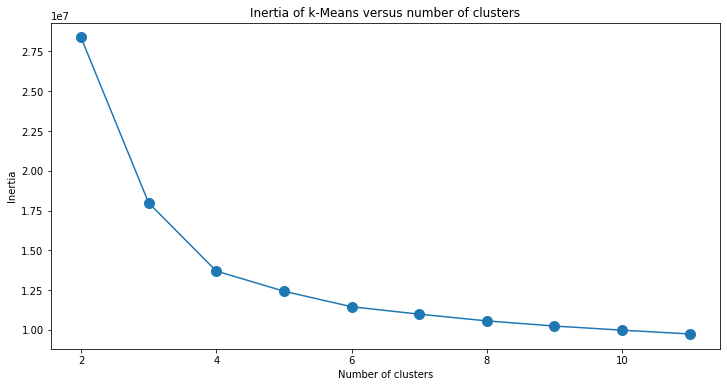

In [168]:
#Prueba: para elegir el hiperparámetro n_clusters, variando de 2 a 11 clusters
scores = [KMeans(n_clusters=i+2).fit(df_skills).inertia_ for i in range(10)]

from matplotlib import pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(np.arange(2, 12), scores,'-o', markersize=10)
plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.title("Inertia of k-Means versus number of clusters")

**Graficamos el resultado kmedias con la cantidad de clases elegida: Visualizamos de a dos variables por vez**

In [169]:
data=[]
bool_crack=df_n["overall"] > 85
bool_no_crack=df_n["overall"]<86


#Eligo dos números entre 0 y  de n_skills-1
skill_1=skills_ratings[5]
skill_2=skills_ratings[9]


kmean_clusters = go.Scatter(x=df_skills[skill_1], y=df_skills[skill_2],
                                mode='markers',
                                text=df_n.loc[:,'short_name'],
                                marker=dict(
                                size=8,
                                color = clusters.astype(np.float), #set color equal to a variable
                                colorscale='Portland',
                                showscale=False)
                           )

crack =go.Scatter(x=df_skills.loc[bool_crack,skill_1], y=df_skills.loc[bool_crack,skill_2],name='Ckacks!!',
                      text=df_n.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[kmean_clusters,crack]

layout = go.Layout(title="Clustering K means ",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=1000,height=1000)

fig = go.Figure(data=data, layout=layout)

iplot(fig)

In [170]:
df_clusters=df_n.copy()
df_clusters['kmeans'] = km.labels_ #clusters
print('Kmeans encontró: ', max(km.labels_)+1, 'clusters, nosotros forzamos la cantidad')

Kmeans encontró:  3 clusters, nosotros forzamos la cantidad


In [171]:
max(km.labels_)

2

**EVALUACIÓN**

**EJERCICIO: Análisis exploratorio de los clusters, usando las clases asignadas por kmeans** 
- Cantidad de observaciones por Cluster
- Análisis descriptivo separando por Cluster
- Tabla de contingencia alguna categórica vs clusters
- Silohuette?


- Observaciones

In [172]:
df_cluster_count = df_clusters.groupby(by=['kmeans']).count()[['sofifa_id']]
df_cluster_count.columns = ['observaciones']
df_cluster_count

,observaciones
kmeans,
0,1932
1,2384
2,440


In [173]:
df_clusters[df_clusters['kmeans'] == 0].head(1)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,...,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,kmeans
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,NaN,2004-07-01,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,...,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2,0


In [174]:
df_clusters[df_clusters['kmeans'] == 1].head(1)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,...,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,kmeans
7,203376,https://sofifa.com/player/203376/virgil-van-di...,V. van Dijk,Virgil van Dijk,27,1991-07-08,193,92,Netherlands,Liverpool,90,91,78000000,200000,CB,Right,3,3,2,Medium/Medium,Normal,Yes,150200000.0,"#Tackling , #Tactician , #Strength, #Complete ...",LCB,4.0,NaN,2018-01-01,2023.0,LCB,4.0,77.0,60.0,70.0,71.0,90.0,86.0,NaN,NaN,NaN,NaN,NaN,NaN,"Diver, Avoids Using Weaker Foot, Leadership, L...",53,52,86,78,45,70,...,79,61,88,53,81,90,75,92,64,82,89,47,65,62,89,91,92,85,13,10,13,11,11,69+3,69+3,69+3,67+3,69+3,69+3,69+3,67+3,69+3,69+3,69+3,69+3,74+3,74+3,74+3,69+3,79+3,83+3,83+3,83+3,79+3,81+3,87+3,87+3,87+3,81+3,1


In [175]:
df_clusters[df_clusters['kmeans'] == 2].head(1)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,...,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,kmeans
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,Normal,Yes,164700000.0,NaN,GK,13.0,NaN,2014-07-16,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,"Flair, Acrobatic Clearance",13,11,15,43,13,12,...,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2


- Análisis descriptivo por cada cluster K-means

In [176]:
from IPython.display import display, HTML
for cluster in range(0,len(df_clusters['kmeans'].unique())):
    km_cluster_ = df_clusters[df_clusters['kmeans'] == cluster]
    print("\n\033[1m-Análisis descriptivo de Cluster nro: ( " , cluster , " )\n\033[0m")
    display(HTML(km_cluster_[skills_ratings].describe().to_html()))


-Análisis descriptivo de Cluster nro: (  0  )



,skill_moves,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
count,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000
mean,3.372671,75.171325,71.348344,68.017081,75.267598,40.555383,65.698758,65.790890,71.540890,60.496894,71.594203,66.869048,75.448758,68.195135,61.362836,62.469462,75.627329,75.513975,74.895963,76.144928,72.035197,72.263975,74.295549,66.414596,70.686335,65.849896,69.525362,58.738095,38.755176,73.522257,69.591097,66.927019,71.689959,39.868530,37.923395,33.732919,10.589027,10.648551,10.677019,10.511905,10.493789
std,0.582712,10.142799,5.318181,7.720199,5.423860,10.888852,8.698669,11.091949,6.418746,13.338383,6.221688,8.685955,5.948333,10.681089,13.636903,11.068386,5.180316,10.644693,10.311465,9.992369,5.900943,11.915058,6.479552,12.734937,9.008079,12.986319,7.219850,13.482510,14.455797,5.896661,8.240902,8.615280,6.803953,13.753858,14.369444,13.649041,3.157991,3.111793,3.133856,3.164629,3.181456
min,2.000000,30.000000,53.000000,41.000000,55.000000,18.000000,35.000000,25.000000,44.000000,20.000000,52.000000,32.000000,53.000000,26.000000,22.000000,21.000000,57.000000,28.000000,30.000000,32.000000,54.000000,29.000000,39.000000,29.000000,30.000000,27.000000,40.000000,22.000000,10.000000,53.000000,38.000000,31.000000,47.000000,10.000000,10.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.000000,69.000000,68.000000,63.000000,72.000000,33.000000,60.000000,61.000000,67.000000,50.000000,67.000000,62.000000,72.000000,62.000000,52.000000,56.000000,72.000000,69.000000,69.000000,71.000000,68.000000,66.000000,70.000000,59.000000,66.000000,58.000000,65.000000,49.000000,28.000000,69.000000,65.000000,62.000000,67.000000,29.000000,27.000000,23.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,3.000000,76.000000,71.000000,69.000000,75.000000,38.000000,66.000000,68.000000,72.000000,60.500000,72.000000,68.000000,75.000000,69.000000,64.000000,64.000000,75.000000,77.000000,76.000000,77.000000,72.000000,74.000000,75.000000,68.000000,71.000000,66.000000,70.000000,59.000000,37.000000,73.000000,70.000000,68.000000,72.000000,38.000000,36.000000,31.000000,11.000000,11.000000,11.000000,10.000000,10.000000
75%,4.000000,82.000000,74.000000,73.000000,78.000000,47.000000,72.000000,73.000000,76.000000,71.000000,75.000000,73.000000,79.000000,76.000000,72.000000,70.000000,78.000000,83.000000,82.000000,83.000000,76.000000,80.000000,78.000000,75.000000,76.000000,75.000000,74.000000,69.000000,48.000000,77.000000,75.000000,73.000000,76.000000,50.000000,48.000000,43.000000,13.000000,13.000000,13.000000,13.000000,13.000000
max,5.000000,96.000000,93.000000,92.000000,96.000000,74.000000,90.000000,93.000000,95.000000,93.000000,92.000000,90.000000,97.000000,94.000000,94.000000,92.000000,96.000000,97.000000,96.000000,96.000000,96.000000,96.000000,95.000000,95.000000,93.000000,95.000000,94.000000,93.000000,83.000000,95.000000,94.000000,92.000000,96.0000


-Análisis descriptivo de Cluster nro: (  1  )



,skill_moves,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
count,2384.000000,2384.000000,2384.000000,2384.000000,2384.000000,2384.000000,2384.000000,2384.000000,2384.000000,2384.000000,2384.00000,2384.000000,2384.000000,2384.000000,2384.000000,2384.000000,2384.000000,2384.000000,2384.000000,2384.000000,2384.000000,2384.000000,2384.000000,2384.000000,2384.000000,2384.000000,2384.000000,2384.000000,2384.000000,2384.000000,2384.000000,2384.000000,2384.000000,2384.000000,2384.000000,2384.000000,2384.000000,2384.000000,2384.000000,2384.000000,2384.000000
mean,2.612836,65.640940,53.093121,64.517198,66.311661,72.264262,74.028523,60.139681,47.414849,66.803691,71.42156,46.646393,64.317114,55.794044,49.508809,67.388003,69.526007,65.144715,66.012584,64.816695,71.769715,63.969799,65.344799,71.103607,74.392617,73.829698,54.767617,74.684564,72.919044,55.504195,60.494128,52.157718,70.192953,71.839346,74.083054,71.765101,10.631292,10.718960,10.763423,10.783557,10.665688
std,0.587907,12.215691,12.517069,9.177672,9.367300,4.897160,5.575938,14.995068,14.163109,9.723153,6.89698,14.358560,11.661693,15.717847,16.028508,8.565565,7.894563,12.651384,12.558409,12.123662,5.302616,13.000013,12.033848,10.834609,10.457285,8.968141,16.193999,7.788130,5.404470,15.243305,13.391110,12.362423,6.838563,5.938751,4.962197,5.739208,3.636373,3.480279,3.547447,3.679930,3.389064
min,2.000000,29.000000,15.000000,34.000000,34.000000,56.000000,47.000000,11.000000,13.000000,22.000000,44.00000,11.000000,22.000000,13.000000,10.000000,25.000000,34.000000,28.000000,29.000000,26.000000,55.000000,26.000000,15.000000,30.000000,29.000000,29.000000,12.000000,36.000000,50.000000,12.000000,13.000000,13.000000,32.000000,43.000000,56.000000,40.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,59.000000,44.000000,59.000000,61.000000,69.000000,71.000000,50.000000,36.000000,60.000000,67.00000,35.000000,58.000000,44.000000,36.000000,63.000000,65.000000,58.000000,60.000000,58.000000,68.000000,57.000000,58.000000,65.000000,68.000000,68.000000,42.000000,70.000000,70.000000,45.000000,52.000000,43.000000,66.000000,68.750000,71.000000,69.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,3.000000,67.000000,55.000000,66.000000,69.000000,72.000000,74.000000,64.000000,49.000000,68.000000,72.00000,47.000000,67.000000,59.000000,49.000000,68.000000,71.000000,66.000000,67.000000,67.000000,72.000000,66.000000,67.500000,72.000000,75.000000,74.000000,58.000000,75.000000,73.000000,60.000000,63.000000,52.000000,70.000000,72.000000,74.000000,72.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,3.000000,74.000000,63.000000,71.000000,73.000000,75.000000,78.000000,72.000000,59.000000,74.000000,76.00000,58.000000,73.000000,68.000000,62.000000,73.000000,75.000000,74.000000,75.000000,73.000000,75.000000,73.000000,74.000000,78.000000,82.000000,80.000000,68.000000,80.000000,76.000000,67.000000,71.000000,61.000000,75.000000,75.000000,77.000000,75.000000,13.000000,13.000000,13.000000,13.000000,13.000000
max,5.000000,94.000000,82.000000,87.000000,90.000000,90.000000,89.000000,91.000000,82.000000,92.000000,91.00000,87.000000,90.000000,90.000000,92.000000,89.000000,92.000000,94.000000,94.000000,92.000000,93.000000,94.000000,95.000000,94.000000,97.000000,95.000000,87.000000,95.000000,92.000000,85.000000,88.000000,91.000000,95.000000,94.


-Análisis descriptivo de Cluster nro: (  2  )



,skill_moves,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
count,440.0,0.0,0.0,0.0,0.0,0.0,0.0,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.0,NaN,NaN,NaN,NaN,NaN,NaN,14.945455,13.175000,14.909091,30.352273,13.706818,15.400000,15.740909,15.034091,29.470455,22.768182,44.488636,44.452273,46.302273,71.136364,44.947727,52.845455,64.925000,33.927273,65.977273,13.956818,29.429545,19.715909,12.756818,46.470455,22.175000,53.890909,16.902273,14.579545,14.352273,75.765909,72.715909,70.279545,74.331818,77.222727
std,0.0,NaN,NaN,NaN,NaN,NaN,NaN,4.477402,3.302351,4.320941,8.677780,3.371183,4.273028,5.188138,5.052907,9.659536,6.481154,9.170611,8.970846,11.994570,5.449670,10.336458,4.827666,9.998237,6.619099,9.627903,3.294981,7.893052,4.950665,3.500400,12.653937,7.252605,11.487416,4.845870,3.373222,3.255413,4.509895,4.729948,6.407324,4.664496,4.709844
min,1.0,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,5.000000,7.000000,11.000000,5.000000,7.000000,6.000000,4.000000,9.000000,5.000000,15.000000,16.000000,14.000000,55.000000,20.000000,32.000000,32.000000,13.000000,26.000000,5.000000,11.000000,7.000000,3.000000,10.000000,9.000000,17.000000,7.000000,7.000000,8.000000,61.000000,61.000000,43.000000,62.000000,66.000000
25%,1.0,NaN,NaN,NaN,NaN,NaN,NaN,12.000000,11.000000,12.000000,25.000000,11.000000,12.000000,12.000000,12.000000,22.000000,19.000000,38.000000,38.000000,37.000000,68.000000,38.000000,50.000000,60.000000,30.000000,60.000000,12.000000,23.000000,16.000000,11.000000,39.000000,18.000000,49.750000,13.000000,12.000000,12.000000,72.750000,69.000000,66.000000,71.000000,74.000000
50%,1.0,NaN,NaN,NaN,NaN,NaN,NaN,14.000000,13.000000,14.000000,30.000000,13.000000,15.000000,15.000000,14.000000,28.000000,22.000000,45.000000,45.000000,45.000000,71.000000,45.000000,53.000000,67.000000,34.000000,68.000000,14.000000,29.000000,20.000000,13.000000,46.000000,22.000000,57.000000,16.000000,14.000000,14.000000,75.000000,72.000000,70.000000,74.000000,77.000000
75%,1.0,NaN,NaN,NaN,NaN,NaN,NaN,18.000000,15.000000,17.000000,35.000000,16.000000,18.000000,18.000000,17.000000,35.000000,25.250000,50.000000,50.000000,56.000000,74.000000,52.250000,56.000000,72.000000,40.000000,72.000000,16.000000,36.000000,23.000000,15.000000,55.000000,25.000000,62.000000,20.000000,17.000000,16.000000,79.000000,75.000000,75.000000,77.000000,80.000000
max,1.0,NaN,NaN,NaN,NaN,NaN,NaN,35.000000,27.000000,47.000000,61.000000,26.000000,30.000000,69.000000,74.000000,63.000000,46.000000,65.000000,65.000000,71.000000,88.000000,69.000000,70.000000,85.000000,45.000000,85.000000,21.000000,45.000000,30.000000,27.000000,72.000000,54.000000,71.000000,29.000000,24.000000,25.000000,90.000000,92.000000,93.000000,91.000000,92.000000


- Tabla de contingencia: Categórica vs Clusters

In [177]:
pd.crosstab(index=df_clusters['nationality'], columns=df_clusters['kmeans'], margins=True)

kmeans,0,1,2,All
nationality,,,,
Albania,1,8,2,11
Algeria,13,13,1,27
Angola,5,3,0,8
Argentina,176,175,34,385
Armenia,3,0,0,3
Australia,7,8,5,20
Austria,23,32,7,62
Bahrain,1,0,0,1
Belgium,41,47,12,100


In [178]:
pd.crosstab(index=df_clusters['team_position'], columns=df_clusters['kmeans'], margins=True)

kmeans,0,1,2,All
team_position,,,,
CAM,128,20,0,148
CB,0,40,0,40
CDM,5,77,0,82
CF,9,0,0,9
CM,6,24,0,30
GK,0,0,279,279
LAM,12,1,0,13
LB,1,163,0,164
LCB,0,256,0,256


In [179]:
df_skills

,skill_moves,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,4,87.00000,92.000000,92.000000,96.000000,39.000000,66.000000,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8
1,5,90.00000,93.000000,82.000000,89.000000,35.000000,78.000000,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11
2,5,91.00000,85.000000,87.000000,95.000000,32.000000,58.000000,87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11
3,1,69.90709,61.264829,66.083874,70.320667,58.070204,70.299815,13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89
4,4,91.00000,83.000000,86.000000,94.000000,35.000000,66.000000,81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,11,12,6,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4751,3,67.00000,66.000000,65.000000,69.000000,49.000000,54.000000,58,70,54,68,59,64,62,41,65,73,62,71,72,75,78,58,44,52,54,68,60,65,74,71,55,76,34,52,46,12,12,16,7,8
4752,4,64.00000,71.000000,62.000000,73.000000,33.000000,71.000000,57,71,66,64,75,74,67,68,58,75,66,62,67,73,57,73,64,65,79,70,60,37,65,66,70,71,18,33,36,8,8,10,12,12
4753,3,58.00000,60.000000,70.000000,68.000000,68.000000,73.000000,70,53,61,70,51,69,70,53,77,68,60,57,67,69,64,71,63,77,68,64,83,65,65,68,61,69,69,71,65,10,7,12,13,8
4754,2,64.00000,59.000000,62.000000,67.000000,72.000000,74.000000,58,54,68,66,50,67,49,53,64,69,62,66,64,70,65,70,61,73,77,64,71,72,56,65,61,69,71,73,72,6,10,9,11,7


- Silohuette K-Means

Automatically created module for IPython interactive environment
Para n_clusters = 2 El silhouette_score promedio es : 0.6024778875874445
Para n_clusters = 3 El silhouette_score promedio es : 0.3661876817447275
Para n_clusters = 4 El silhouette_score promedio es : 0.3369764303371481
Para n_clusters = 5 El silhouette_score promedio es : 0.2919128146360797
Para n_clusters = 6 El silhouette_score promedio es : 0.23885988433260363


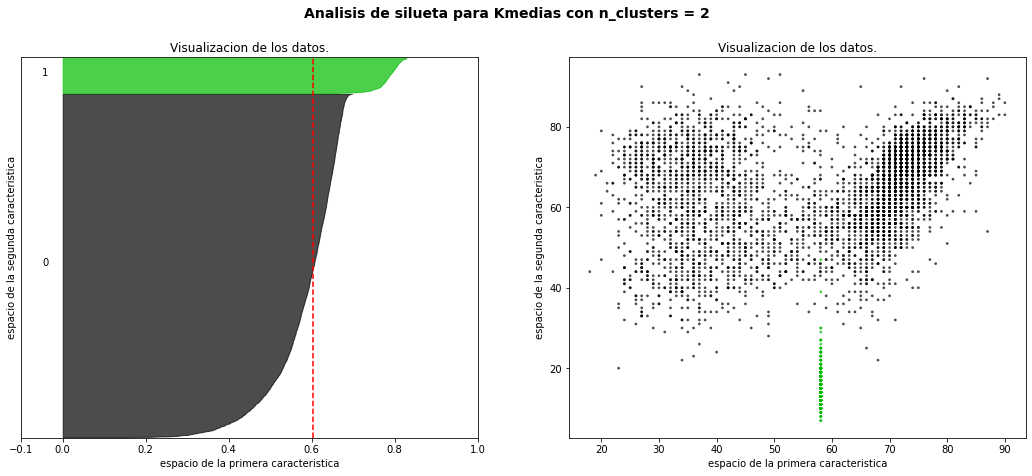

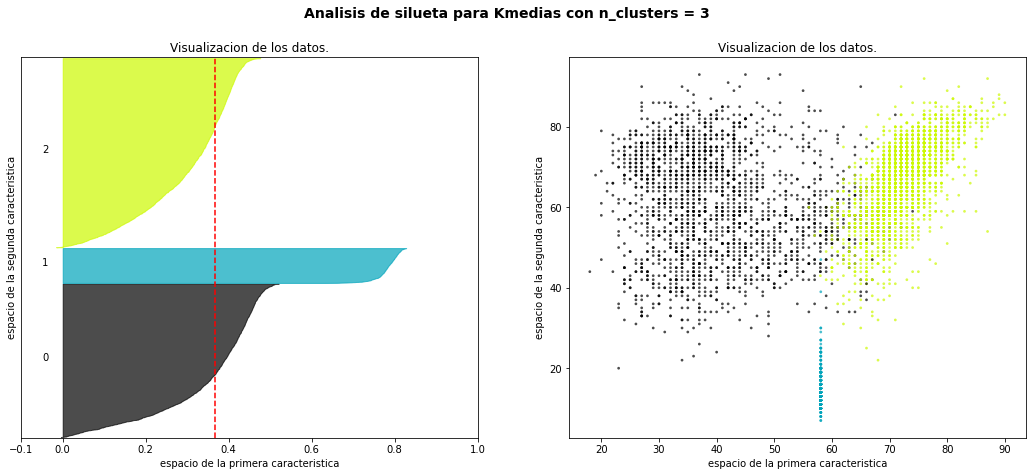

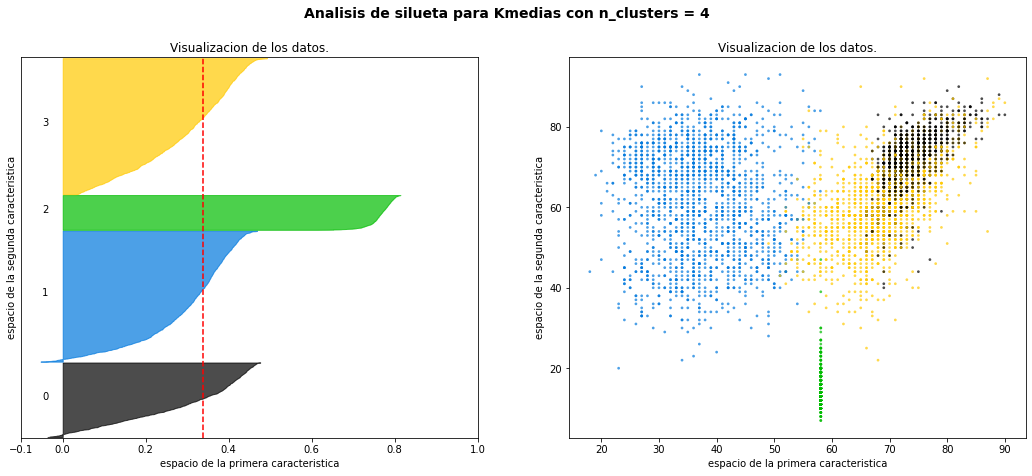

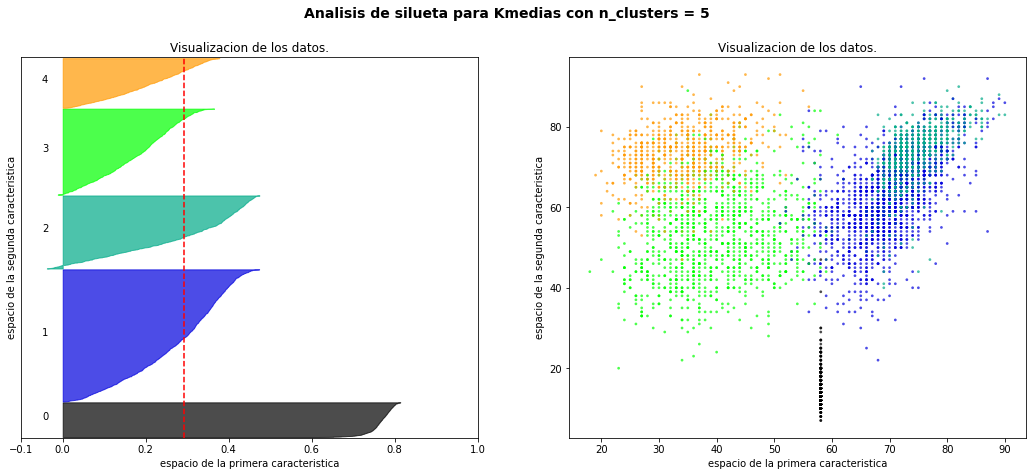

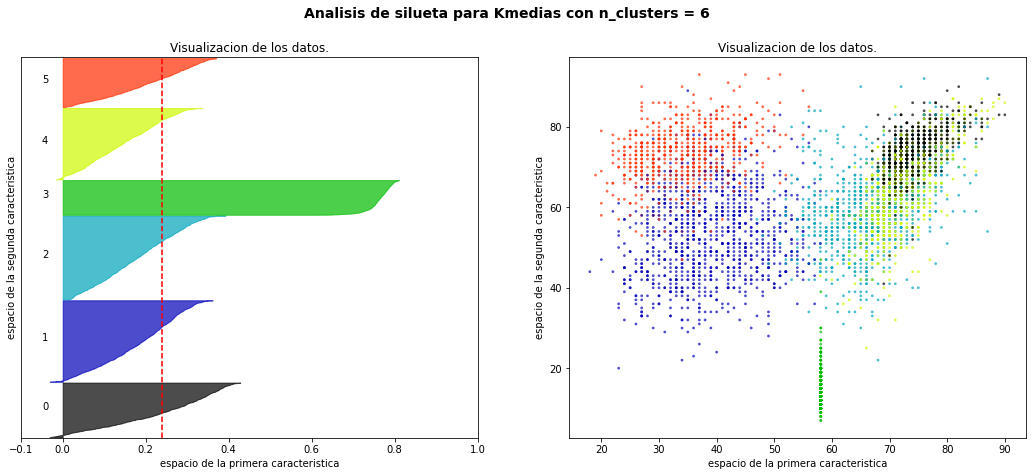

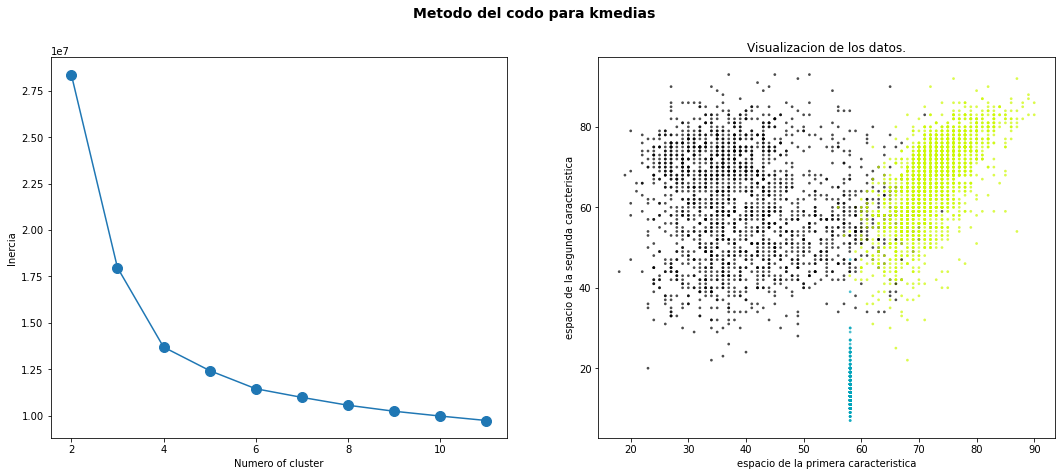

In [180]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)
range_n_clusters = [2,3, 4, 5, 6]
sse ={}
for n_clusters in range_n_clusters: 
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(df_skills) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer =KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df_skills)
    sse[n_clusters] = clusterer.inertia_

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(df_skills, cluster_labels)
    print("Para n_clusters =", n_clusters,
          "El silhouette_score promedio es :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df_skills, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("Visualizacion de los datos.")
    ax1.set_xlabel("espacio de la primera caracteristica")
    ax1.set_ylabel("espacio de la segunda caracteristica")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])


    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(df_skills[skill_1], df_skills[skill_2], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    ax2.set_title("Visualizacion de los datos.")
    ax2.set_xlabel("espacio de la primera caracteristica")
    ax2.set_ylabel("espacio de la segunda caracteristica")

    plt.suptitle(("Analisis de silueta para Kmedias "
                  "con n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
    #plt.savefig("kmeans_%d" % n_clusters, dpi=300)

plt.show()

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)
plt.suptitle(("Metodo del codo para kmedias "),
                 fontsize=14, fontweight='bold')
ax1.plot(np.arange(2, 12), scores,'-o', markersize=10)
#ax1.plot(list(sse.keys()), list(sse.values()))
ax1.set_xlabel("Numero of cluster")
ax1.set_ylabel("Inercia")

clusterer = KMeans(n_clusters=n_clust, random_state=10)
cluster_labels = clusterer.fit_predict(df_skills)
    
colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clust)
ax2.scatter(df_skills[skill_1], df_skills[skill_2], marker='.', s=30, lw=0, alpha=0.7,c=colors, edgecolor='k')

ax2.set_title("Visualizacion de los datos.")
ax2.set_xlabel("espacio de la primera caracteristica")
ax2.set_ylabel("espacio de la segunda caracteristica")

#plt.savefig("kmeans_elbow", dpi=300)
plt.show()

# 4.-Clustering-Mean-Shift 

- NO es necesario definirle la cantidad de grupos/clusters
- NO es escalable, computacionalmente es muy pesado. Cada dato tienen un proceso iterativo en donde en cada iteración considera los vecinos a menos de un radio de distancia.
- Hipeparámetros: radio (de cobertura para cálculo de media)

In [181]:
import numpy as np
from sklearn import decomposition
from sklearn import cluster, datasets, mixture
from sklearn.cluster import KMeans, MeanShift, estimate_bandwidth
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.pipeline import Pipeline

n_samples = len(df_skills)

X = StandardScaler().fit_transform(df_skills)

bandwidth = estimate_bandwidth(X, quantile=0.1, n_samples=n_samples)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)

pipe = Pipeline([('scaler',RobustScaler()), ('ms',ms)] )

pipe.fit(df_skills)

clusters2 = ms.labels_
cluster_centers = ms.cluster_centers_
labels = ms.labels_
labels_unique = np.unique(clusters2)
n_clusters_ = len(labels_unique)

print("Numero estimado de clusters para Mean Shift : %d" % n_clusters_)
#print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels))

Numero estimado de clusters para Mean Shift : 2


In [182]:
data=[]
bool_crack=df_n["overall"] > 85
bool_no_crack=df_n["overall"]<86


#Eligo dos números entre 0 y  de n_skills-1
skill_1=skills_ratings[5]
skill_2=skills_ratings[14]


MeanShift_clusters = go.Scatter(x=df_skills[skill_1], y=df_skills[skill_2],
                                mode='markers',
                                text=df_n.loc[:,'short_name'],
                                marker=dict(
                                size=8,
                                color = clusters2.astype(np.float), #set color equal to a variable
                                colorscale='Portland',
                                showscale=False)
                           )

crack =go.Scatter(x=df_skills.loc[bool_crack,skill_1], y=df_skills.loc[bool_crack,skill_2],name='Top players',
                      text=df_n.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[MeanShift_clusters,crack]

layout = go.Layout(title="Mean Shift",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=1000,height=1000)

fig = go.Figure(data=data, layout=layout)

iplot(fig)

In [183]:
df_clusters['MeanShift'] = ms.labels_ #clusters2
print('Kmeans encontró: ', max(km.labels_)+1, 'clusters, nosotros lo forzamos')
print('Mean shift encontró ', max(ms.labels_)+1, 'clusters, según los hiperparámetros elegidos')

Kmeans encontró:  3 clusters, nosotros lo forzamos
Mean shift encontró  2 clusters, según los hiperparámetros elegidos


**EVALUACIÓN**

**EJERCICIO EN GRUPO: Análisis exploratorio de los clusters, usando las clases asignadas por MeanShift** 

- Cantidad de observaciones por Cluster
- Análisis descriptivo separando por Cluster
- Tabla de contingencia alguna categórica vs clusters
- Silohuette?


- Observaciones clusters Meanshift

In [184]:
df_cluster_count_ms = df_clusters.groupby(by=['MeanShift']).count()[['sofifa_id']]
df_cluster_count_ms.columns = ['observaciones']
df_cluster_count_ms

,observaciones
MeanShift,
0,4313
1,443


- Análisis descriptivo por cada cluster Meanshift

In [185]:
from IPython.display import display, HTML
for cluster in range(0,len(df_clusters['MeanShift'].unique())):
    ms_cluster_ = df_clusters[df_clusters['MeanShift'] == cluster]
    print("\n\033[1m-Análisis descriptivo de Cluster nro: ( " , cluster , " )\n\033[0m")
    display(HTML(ms_cluster_[skills_ratings].describe().to_html()))


-Análisis descriptivo de Cluster nro: (  0  )



,skill_moves,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
count,4313.000000,4313.000000,4313.000000,4313.000000,4313.000000,4313.000000,4313.000000,4313.000000,4313.000000,4313.000000,4313.000000,4313.000000,4313.000000,4313.000000,4313.000000,4313.000000,4313.000000,4313.000000,4313.000000,4313.000000,4313.000000,4313.000000,4313.000000,4313.000000,4313.000000,4313.000000,4313.000000,4313.000000,4313.000000,4313.000000,4313.000000,4313.000000,4313.000000,4313.000000,4313.000000,4313.000000,4313.000000,4313.000000,4313.000000,4313.000000,4313.000000
mean,2.953397,69.902620,61.271505,66.087642,70.322050,58.054718,70.298168,62.676096,58.222119,63.971250,71.499420,55.701368,69.303269,61.348018,54.817065,65.186645,72.258521,69.781359,69.985161,69.885231,71.882448,67.681892,69.358219,69.003710,72.732901,70.257361,61.379782,67.539068,57.610248,63.578484,64.575701,58.773012,70.867146,57.511245,57.880362,54.724322,10.575470,10.658938,10.695108,10.626014,10.564572
std,0.696804,12.287272,13.476884,8.730782,9.026678,17.743607,8.259791,13.673425,16.530003,11.900177,6.604874,15.775952,11.026799,15.019442,16.125096,10.067660,7.460296,12.873842,12.420966,12.555426,5.575577,13.190199,10.886810,11.948016,10.004872,11.649093,14.901983,13.330149,19.955446,14.971987,12.240266,13.099862,6.860370,18.888071,20.719056,21.429552,3.125679,3.131373,3.167702,3.178070,3.169247
min,2.000000,29.000000,15.000000,34.000000,34.000000,18.000000,35.000000,11.000000,13.000000,20.000000,44.000000,11.000000,22.000000,13.000000,10.000000,21.000000,34.000000,28.000000,29.000000,26.000000,54.000000,26.000000,15.000000,29.000000,29.000000,27.000000,12.000000,22.000000,10.000000,12.000000,13.000000,13.000000,32.000000,10.000000,10.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,63.000000,53.000000,61.000000,66.000000,40.000000,66.000000,56.000000,47.000000,56.000000,67.000000,44.000000,65.000000,52.000000,42.000000,60.000000,69.000000,63.000000,64.000000,63.000000,68.000000,60.000000,64.000000,63.000000,67.000000,64.000000,55.000000,60.000000,39.000000,58.000000,58.000000,49.000000,66.000000,41.000000,38.000000,33.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,3.000000,71.000000,65.000000,68.000000,72.000000,66.000000,71.000000,66.000000,63.000000,66.000000,72.000000,59.000000,72.000000,65.000000,56.000000,67.000000,73.000000,71.000000,71.000000,72.000000,72.000000,69.000000,72.000000,70.000000,73.000000,71.000000,66.000000,70.000000,67.000000,68.000000,67.000000,60.000000,71.000000,65.000000,68.000000,65.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,3.000000,78.000000,71.000000,72.000000,76.000000,72.000000,76.000000,72.000000,71.000000,73.000000,76.000000,68.000000,76.000000,72.000000,68.000000,72.000000,77.000000,78.000000,78.000000,78.000000,75.000000,77.000000,77.000000,77.000000,79.000000,78.000000,72.000000,77.000000,73.000000,74.000000,73.000000,69.000000,75.000000,72.000000,74.000000,72.000000,13.000000,13.000000,13.000000,13.000000,13.000000
max,5.000000,96.000000,93.000000,92.000000,96.000000,90.000000,90.000000,93.000000,95.000000,93.000000,92.000000,90.000000,97.000000,94.000000,94.000000,92.000000,96.000000,97.000000,96.000000,96.000000,96.000000,96.000000,95.000000,95.000000,97.000000,95.000000,94.000000,95.000000,92.000000,95.000000,94.000000,92.000


-Análisis descriptivo de Cluster nro: (  1  )



,skill_moves,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
count,443.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,443.000000,443.000000,443.000000,443.000000,443.000000,443.000000,443.000000,443.000000,443.000000,443.000000,443.000000,443.000000,443.000000,443.000000,443.000000,443.000000,443.000000,443.000000,443.000000,443.000000,443.000000,443.000000,443.000000,443.000000,443.000000,443.000000,443.000000,443.000000,443.000000,443.000000,443.000000,443.000000,443.000000,443.000000
mean,1.009029,76.333333,51.666667,60.666667,68.333333,80.333333,72.666667,15.203160,13.406321,15.331828,30.625282,13.966140,15.733634,16.022573,15.284424,29.708804,23.090293,44.708804,44.663657,46.485327,71.200903,45.108352,52.891648,64.961625,34.196388,66.009029,14.218962,29.758465,20.126411,13.015801,46.501129,22.383747,53.966140,17.340858,15.031603,14.783296,75.683973,72.573363,70.164786,74.250564,77.006772
std,0.116159,4.725816,9.018500,7.234178,8.504901,3.785939,4.932883,5.653997,4.366383,6.712624,9.263097,4.648868,5.926123,6.264129,5.890049,10.069603,7.557680,9.539325,9.301497,12.180455,5.495601,10.491626,4.915300,10.064762,7.408555,9.617100,4.623313,8.868465,7.010806,4.754348,12.632712,7.692737,11.502556,7.186515,6.435471,6.155452,4.650149,5.075530,6.577242,4.780519,5.377383
min,1.000000,71.000000,43.000000,56.000000,62.000000,76.000000,67.000000,6.000000,5.000000,7.000000,11.000000,5.000000,7.000000,6.000000,4.000000,9.000000,5.000000,15.000000,16.000000,14.000000,55.000000,20.000000,32.000000,32.000000,13.000000,26.000000,5.000000,11.000000,7.000000,3.000000,10.000000,9.000000,17.000000,7.000000,7.000000,8.000000,58.000000,40.000000,42.000000,56.000000,43.000000
25%,1.000000,74.500000,47.000000,56.500000,63.500000,79.000000,71.000000,12.000000,11.000000,12.000000,25.000000,11.000000,12.000000,12.000000,12.000000,22.000000,19.000000,38.000000,38.000000,37.000000,68.000000,38.000000,50.000000,60.000000,30.000000,60.000000,12.000000,23.000000,16.000000,11.000000,39.500000,18.000000,50.000000,13.000000,12.000000,12.000000,72.000000,69.000000,66.000000,71.000000,74.000000
50%,1.000000,78.000000,51.000000,57.000000,65.000000,82.000000,75.000000,14.000000,13.000000,14.000000,30.000000,13.000000,15.000000,15.000000,14.000000,28.000000,22.000000,45.000000,45.000000,45.000000,71.000000,45.000000,53.000000,67.000000,34.000000,68.000000,14.000000,29.000000,20.000000,13.000000,46.000000,22.000000,57.000000,16.000000,14.000000,14.000000,75.000000,72.000000,70.000000,74.000000,77.000000
75%,1.000000,79.000000,56.000000,63.000000,71.500000,82.500000,75.500000,18.000000,15.000000,17.000000,35.000000,16.000000,18.000000,18.000000,17.000000,35.000000,26.000000,51.000000,50.500000,56.000000,74.000000,53.000000,56.000000,72.000000,40.000000,72.000000,16.500000,36.000000,24.000000,15.000000,55.000000,25.000000,62.000000,20.000000,17.000000,16.500000,79.000000,75.000000,75.000000,77.000000,80.000000
max,3.000000,80.000000,61.000000,69.000000,78.000000,83.000000,76.000000,79.000000,56.000000,83.000000,74.000000,63.000000,78.000000,72.000000,74.000000,75.000000,75.000000,83.000000,78.000000,82.000000,88.000000,75.000000,74.000000,91.000000,85.000000,85.000000,61.000000,86.000000,82.000000,58.000000,72.000000,62.000000,71.000000,84.000000,85.000000,82.000000,90.000000,92.000000,93.000000,91.0000

- Tabla contingencia: Categórica vs Clusters

In [186]:
pd.crosstab(index=df_clusters['nationality'], columns=df_clusters['MeanShift'], margins=True)

MeanShift,0,1,All
nationality,,,
Albania,9,2,11
Algeria,26,1,27
Angola,8,0,8
Argentina,351,34,385
Armenia,3,0,3
Australia,15,5,20
Austria,55,7,62
Bahrain,1,0,1
Belgium,88,12,100


In [187]:
pd.crosstab(index=df_clusters['team_position'], columns=df_clusters['MeanShift'], margins=True)

MeanShift,0,1,All
team_position,,,
CAM,148,0,148
CB,40,0,40
CDM,82,0,82
CF,9,0,9
CM,30,0,30
GK,0,279,279
LAM,13,0,13
LB,164,0,164
LCB,256,0,256


- Silohuette Meanshift

Automatically created module for IPython interactive environment
Para n_clusters = 2 El silhouette_score promedio es : 0.5460697532975171


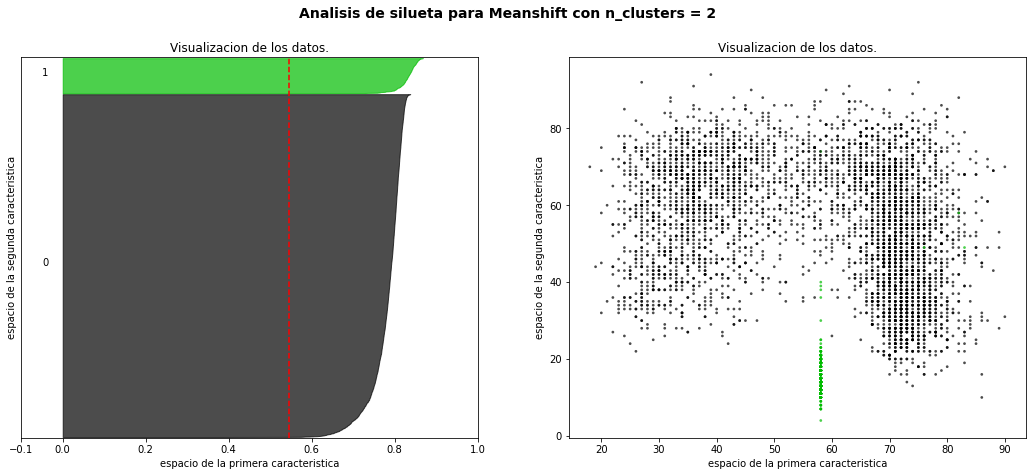

In [188]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

XX = RobustScaler().fit_transform(X)

print(__doc__)
range_n_clusters = [2]
sse ={}
for n_clusters in range_n_clusters: 
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(df_skills) + (n_clusters + 1) * 10])
    clusterer = MeanShift(bandwidth=bandwidth, bin_seeding=True)
    cluster_labels = clusterer.fit_predict(XX)
  
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("Para n_clusters =", n_clusters,
          "El silhouette_score promedio es :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(XX, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("Visualizacion de los datos.")
    ax1.set_xlabel("espacio de la primera caracteristica")
    ax1.set_ylabel("espacio de la segunda caracteristica")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])


    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(df_skills[skill_1], df_skills[skill_2], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    ax2.set_title("Visualizacion de los datos.")
    ax2.set_xlabel("espacio de la primera caracteristica")
    ax2.set_ylabel("espacio de la segunda caracteristica")

    plt.suptitle(("Analisis de silueta para Meanshift "
                  "con n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()
clusterer = MeanShift(bandwidth=bandwidth, bin_seeding=True)
cluster_labels = clusterer.fit_predict(XX)

colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clust)
ax2.scatter(df_skills[skill_1], df_skills[skill_2], marker='.', s=30, lw=0, alpha=0.7,c=colors, edgecolor='k')

ax2.set_title("Visualizacion de los datos.")
ax2.set_xlabel("espacio de la primera caracteristica")
ax2.set_ylabel("espacio de la segunda caracteristica")
plt.show()

**Ahora vemos que agrupamientos podemos hacer excluyendo los arqueros**

# 5.-Clustering-con-Kmeans-sin-arqueros

In [189]:
n=10000

df_n=df.loc[:n]
df_n=df_n[(df_n["team_position"]!='GK')&(df_n['overall']>69)]

skills_ratings = ['skill_moves','pace','shooting' ,'passing' ,'dribbling'
 ,'defending' ,'physic','attacking_crossing'
 ,'attacking_finishing' ,'attacking_heading_accuracy'
 ,'attacking_short_passing' ,'attacking_volleys' ,'skill_dribbling'
 ,'skill_curve' ,'skill_fk_accuracy' ,'skill_long_passing'
 ,'skill_ball_control' ,'movement_acceleration' ,'movement_sprint_speed'
 ,'movement_agility' ,'movement_reactions' ,'movement_balance'
 ,'power_shot_power' ,'power_jumping' ,'power_stamina' ,'power_strength'
 ,'power_long_shots' ,'mentality_aggression' ,'mentality_interceptions'
 ,'mentality_positioning' ,'mentality_vision' ,'mentality_penalties'
 ,'mentality_composure' ,'defending_marking' ,'defending_standing_tackle'
 ,'defending_sliding_tackle' ,'goalkeeping_diving' ,'goalkeeping_handling'
 ,'goalkeeping_kicking' ,'goalkeeping_positioning' ,'goalkeeping_reflexes']

df_skills=df_n[skills_ratings]

skills_nan = pd.DataFrame({'column_names':df_skills.columns.values,
                                'nan_Values':df_skills.isna().sum().values,
                                '%_nan_Values':df_skills.isna().sum().values * 100 / len(df),
                                'type_values':df_skills.dtypes.values})
print("Tabla con valores NaN en Dataset skills")
skills_nan[skills_nan['%_nan_Values']>0]


Tabla con valores NaN en Dataset skills


,column_names,nan_Values,%_nan_Values,type_values
1,pace,200,1.094212,float64
2,shooting,200,1.094212,float64
3,passing,200,1.094212,float64
4,dribbling,200,1.094212,float64
5,defending,200,1.094212,float64
6,physic,200,1.094212,float64


completamos missing values con la media 

In [190]:
df_skills['pace'] = df_skills['pace'].fillna(df_skills['pace'].mean())
df_skills['shooting'] = df_skills['shooting'].fillna(df_skills['shooting'].mean())
df_skills['passing'] = df_skills['passing'].fillna(df_skills['passing'].mean())
df_skills['dribbling'] = df_skills['dribbling'].fillna(df_skills['dribbling'].mean())
df_skills['defending'] = df_skills['defending'].fillna(df_skills['defending'].mean())
df_skills['physic'] = df_skills['physic'].fillna(df_skills['physic'].mean())

In [191]:
from sklearn.cluster import KMeans,MeanShift
from sklearn import decomposition

# Número de clusters buscado
n_clust = 5

km = KMeans(n_clusters=n_clust)
km.fit(df_skills)

# Recuperacion de etiquetas
clusters = km.labels_


In [192]:
data=[]
bool_crack=df_n["overall"] > 85
bool_no_crack=df_n["overall"]<86


#Eligo dos números entre 0 y  de n_skills-1
skill_1=skills_ratings[5]
skill_2=skills_ratings[15]


kmean_clusters = go.Scatter(x=df_skills[skill_1], y=df_skills[skill_2],
                           mode='markers',
                        text=df_n.loc[:,'short_name'],
                           marker=dict(
                                size=5,
                                color = clusters.astype(np.float), #set color equal to a variable
                                colorscale='Portland',
                                showscale=False)
                           )

crack =go.Scatter(x=df_skills.loc[bool_crack,skill_1], y=df_skills.loc[bool_crack,skill_2],name='Top players',
                      text=df_n.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[kmean_clusters,crack]

layout = go.Layout(title="Clustering K means ",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=1000,height=1000)

fig = go.Figure(data=data, layout=layout)

iplot(fig)

In [193]:
from IPython.display import display, HTML
print("\033[1m-KMEANS sin arqueros\033[0m")
for cluster in range(0,len(df_clusters['kmeans'].unique())):
    km_cluster_ = df_clusters[df_clusters['kmeans'] == cluster]
    print("\n\033[1m-Análisis descriptivo de Cluster nro: ( " , cluster , " )\n\033[0m")
    display(HTML(km_cluster_[skills_ratings].describe().to_html()))

-KMEANS sin arqueros

-Análisis descriptivo de Cluster nro: (  0  )



,skill_moves,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
count,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000
mean,3.372671,75.171325,71.348344,68.017081,75.267598,40.555383,65.698758,65.790890,71.540890,60.496894,71.594203,66.869048,75.448758,68.195135,61.362836,62.469462,75.627329,75.513975,74.895963,76.144928,72.035197,72.263975,74.295549,66.414596,70.686335,65.849896,69.525362,58.738095,38.755176,73.522257,69.591097,66.927019,71.689959,39.868530,37.923395,33.732919,10.589027,10.648551,10.677019,10.511905,10.493789
std,0.582712,10.142799,5.318181,7.720199,5.423860,10.888852,8.698669,11.091949,6.418746,13.338383,6.221688,8.685955,5.948333,10.681089,13.636903,11.068386,5.180316,10.644693,10.311465,9.992369,5.900943,11.915058,6.479552,12.734937,9.008079,12.986319,7.219850,13.482510,14.455797,5.896661,8.240902,8.615280,6.803953,13.753858,14.369444,13.649041,3.157991,3.111793,3.133856,3.164629,3.181456
min,2.000000,30.000000,53.000000,41.000000,55.000000,18.000000,35.000000,25.000000,44.000000,20.000000,52.000000,32.000000,53.000000,26.000000,22.000000,21.000000,57.000000,28.000000,30.000000,32.000000,54.000000,29.000000,39.000000,29.000000,30.000000,27.000000,40.000000,22.000000,10.000000,53.000000,38.000000,31.000000,47.000000,10.000000,10.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.000000,69.000000,68.000000,63.000000,72.000000,33.000000,60.000000,61.000000,67.000000,50.000000,67.000000,62.000000,72.000000,62.000000,52.000000,56.000000,72.000000,69.000000,69.000000,71.000000,68.000000,66.000000,70.000000,59.000000,66.000000,58.000000,65.000000,49.000000,28.000000,69.000000,65.000000,62.000000,67.000000,29.000000,27.000000,23.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,3.000000,76.000000,71.000000,69.000000,75.000000,38.000000,66.000000,68.000000,72.000000,60.500000,72.000000,68.000000,75.000000,69.000000,64.000000,64.000000,75.000000,77.000000,76.000000,77.000000,72.000000,74.000000,75.000000,68.000000,71.000000,66.000000,70.000000,59.000000,37.000000,73.000000,70.000000,68.000000,72.000000,38.000000,36.000000,31.000000,11.000000,11.000000,11.000000,10.000000,10.000000
75%,4.000000,82.000000,74.000000,73.000000,78.000000,47.000000,72.000000,73.000000,76.000000,71.000000,75.000000,73.000000,79.000000,76.000000,72.000000,70.000000,78.000000,83.000000,82.000000,83.000000,76.000000,80.000000,78.000000,75.000000,76.000000,75.000000,74.000000,69.000000,48.000000,77.000000,75.000000,73.000000,76.000000,50.000000,48.000000,43.000000,13.000000,13.000000,13.000000,13.000000,13.000000
max,5.000000,96.000000,93.000000,92.000000,96.000000,74.000000,90.000000,93.000000,95.000000,93.000000,92.000000,90.000000,97.000000,94.000000,94.000000,92.000000,96.000000,97.000000,96.000000,96.000000,96.000000,96.000000,95.000000,95.000000,93.000000,95.000000,94.000000,93.000000,83.000000,95.000000,94.000000,92.000000,96.0000


-Análisis descriptivo de Cluster nro: (  1  )



,skill_moves,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
count,2384.000000,2384.000000,2384.000000,2384.000000,2384.000000,2384.000000,2384.000000,2384.000000,2384.000000,2384.000000,2384.00000,2384.000000,2384.000000,2384.000000,2384.000000,2384.000000,2384.000000,2384.000000,2384.000000,2384.000000,2384.000000,2384.000000,2384.000000,2384.000000,2384.000000,2384.000000,2384.000000,2384.000000,2384.000000,2384.000000,2384.000000,2384.000000,2384.000000,2384.000000,2384.000000,2384.000000,2384.000000,2384.000000,2384.000000,2384.000000,2384.000000
mean,2.612836,65.640940,53.093121,64.517198,66.311661,72.264262,74.028523,60.139681,47.414849,66.803691,71.42156,46.646393,64.317114,55.794044,49.508809,67.388003,69.526007,65.144715,66.012584,64.816695,71.769715,63.969799,65.344799,71.103607,74.392617,73.829698,54.767617,74.684564,72.919044,55.504195,60.494128,52.157718,70.192953,71.839346,74.083054,71.765101,10.631292,10.718960,10.763423,10.783557,10.665688
std,0.587907,12.215691,12.517069,9.177672,9.367300,4.897160,5.575938,14.995068,14.163109,9.723153,6.89698,14.358560,11.661693,15.717847,16.028508,8.565565,7.894563,12.651384,12.558409,12.123662,5.302616,13.000013,12.033848,10.834609,10.457285,8.968141,16.193999,7.788130,5.404470,15.243305,13.391110,12.362423,6.838563,5.938751,4.962197,5.739208,3.636373,3.480279,3.547447,3.679930,3.389064
min,2.000000,29.000000,15.000000,34.000000,34.000000,56.000000,47.000000,11.000000,13.000000,22.000000,44.00000,11.000000,22.000000,13.000000,10.000000,25.000000,34.000000,28.000000,29.000000,26.000000,55.000000,26.000000,15.000000,30.000000,29.000000,29.000000,12.000000,36.000000,50.000000,12.000000,13.000000,13.000000,32.000000,43.000000,56.000000,40.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,59.000000,44.000000,59.000000,61.000000,69.000000,71.000000,50.000000,36.000000,60.000000,67.00000,35.000000,58.000000,44.000000,36.000000,63.000000,65.000000,58.000000,60.000000,58.000000,68.000000,57.000000,58.000000,65.000000,68.000000,68.000000,42.000000,70.000000,70.000000,45.000000,52.000000,43.000000,66.000000,68.750000,71.000000,69.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,3.000000,67.000000,55.000000,66.000000,69.000000,72.000000,74.000000,64.000000,49.000000,68.000000,72.00000,47.000000,67.000000,59.000000,49.000000,68.000000,71.000000,66.000000,67.000000,67.000000,72.000000,66.000000,67.500000,72.000000,75.000000,74.000000,58.000000,75.000000,73.000000,60.000000,63.000000,52.000000,70.000000,72.000000,74.000000,72.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,3.000000,74.000000,63.000000,71.000000,73.000000,75.000000,78.000000,72.000000,59.000000,74.000000,76.00000,58.000000,73.000000,68.000000,62.000000,73.000000,75.000000,74.000000,75.000000,73.000000,75.000000,73.000000,74.000000,78.000000,82.000000,80.000000,68.000000,80.000000,76.000000,67.000000,71.000000,61.000000,75.000000,75.000000,77.000000,75.000000,13.000000,13.000000,13.000000,13.000000,13.000000
max,5.000000,94.000000,82.000000,87.000000,90.000000,90.000000,89.000000,91.000000,82.000000,92.000000,91.00000,87.000000,90.000000,90.000000,92.000000,89.000000,92.000000,94.000000,94.000000,92.000000,93.000000,94.000000,95.000000,94.000000,97.000000,95.000000,87.000000,95.000000,92.000000,85.000000,88.000000,91.000000,95.000000,94.


-Análisis descriptivo de Cluster nro: (  2  )



,skill_moves,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
count,440.0,0.0,0.0,0.0,0.0,0.0,0.0,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.0,NaN,NaN,NaN,NaN,NaN,NaN,14.945455,13.175000,14.909091,30.352273,13.706818,15.400000,15.740909,15.034091,29.470455,22.768182,44.488636,44.452273,46.302273,71.136364,44.947727,52.845455,64.925000,33.927273,65.977273,13.956818,29.429545,19.715909,12.756818,46.470455,22.175000,53.890909,16.902273,14.579545,14.352273,75.765909,72.715909,70.279545,74.331818,77.222727
std,0.0,NaN,NaN,NaN,NaN,NaN,NaN,4.477402,3.302351,4.320941,8.677780,3.371183,4.273028,5.188138,5.052907,9.659536,6.481154,9.170611,8.970846,11.994570,5.449670,10.336458,4.827666,9.998237,6.619099,9.627903,3.294981,7.893052,4.950665,3.500400,12.653937,7.252605,11.487416,4.845870,3.373222,3.255413,4.509895,4.729948,6.407324,4.664496,4.709844
min,1.0,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,5.000000,7.000000,11.000000,5.000000,7.000000,6.000000,4.000000,9.000000,5.000000,15.000000,16.000000,14.000000,55.000000,20.000000,32.000000,32.000000,13.000000,26.000000,5.000000,11.000000,7.000000,3.000000,10.000000,9.000000,17.000000,7.000000,7.000000,8.000000,61.000000,61.000000,43.000000,62.000000,66.000000
25%,1.0,NaN,NaN,NaN,NaN,NaN,NaN,12.000000,11.000000,12.000000,25.000000,11.000000,12.000000,12.000000,12.000000,22.000000,19.000000,38.000000,38.000000,37.000000,68.000000,38.000000,50.000000,60.000000,30.000000,60.000000,12.000000,23.000000,16.000000,11.000000,39.000000,18.000000,49.750000,13.000000,12.000000,12.000000,72.750000,69.000000,66.000000,71.000000,74.000000
50%,1.0,NaN,NaN,NaN,NaN,NaN,NaN,14.000000,13.000000,14.000000,30.000000,13.000000,15.000000,15.000000,14.000000,28.000000,22.000000,45.000000,45.000000,45.000000,71.000000,45.000000,53.000000,67.000000,34.000000,68.000000,14.000000,29.000000,20.000000,13.000000,46.000000,22.000000,57.000000,16.000000,14.000000,14.000000,75.000000,72.000000,70.000000,74.000000,77.000000
75%,1.0,NaN,NaN,NaN,NaN,NaN,NaN,18.000000,15.000000,17.000000,35.000000,16.000000,18.000000,18.000000,17.000000,35.000000,25.250000,50.000000,50.000000,56.000000,74.000000,52.250000,56.000000,72.000000,40.000000,72.000000,16.000000,36.000000,23.000000,15.000000,55.000000,25.000000,62.000000,20.000000,17.000000,16.000000,79.000000,75.000000,75.000000,77.000000,80.000000
max,1.0,NaN,NaN,NaN,NaN,NaN,NaN,35.000000,27.000000,47.000000,61.000000,26.000000,30.000000,69.000000,74.000000,63.000000,46.000000,65.000000,65.000000,71.000000,88.000000,69.000000,70.000000,85.000000,45.000000,85.000000,21.000000,45.000000,30.000000,27.000000,72.000000,54.000000,71.000000,29.000000,24.000000,25.000000,90.000000,92.000000,93.000000,91.000000,92.000000


# 6.-Clustering-Mean-Shift-sin-arqueros 

In [194]:
from sklearn.cluster import KMeans,MeanShift
from sklearn import decomposition

n_samples = len(df_skills)

bandwidth = estimate_bandwidth(X, quantile=0.1, n_samples=n_samples)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)

pipe = Pipeline([('scaler',RobustScaler()), ('ms',ms)] )

pipe.fit(df_skills)

clusters2 = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(clusters2)
n_clusters_ = len(labels_unique)

print("Numero de clusters encontrado por Mean Shift : %d" % n_clusters_)


Numero de clusters encontrado por Mean Shift : 1


In [199]:
data=[]
bool_crack=df_n["overall"] > 85
bool_no_crack=df_n["overall"]<86


#Eligo dos números entre 0 y  de n_skills-1
skill_1=skills_ratings[5]
skill_2=skills_ratings[14]


MeanShift_clusters = go.Scatter(x=df_skills[skill_1], y=df_skills[skill_2],
                           mode='markers',
                        text=df_n.loc[:,'short_name'],
                           marker=dict(
                                size=8,
                                color = clusters2.astype(np.float), #set color equal to a variable
                                colorscale='Portland',
                                showscale=False)
                           )

crack =go.Scatter(x=df_skills.loc[bool_crack,skill_1], y=df_skills.loc[bool_crack,skill_2],name='Top players',
                      text=df_n.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[MeanShift_clusters,crack]

layout = go.Layout(title="Mean Shift",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=1000,height=1000)

fig = go.Figure(data=data, layout=layout)

iplot(fig)

In [196]:
df_clusters=df_skills
df_clusters['kmeans'] = km.labels_ #clusters
df_clusters['MeanShift'] = ms.labels_ #clusters2

Automatically created module for IPython interactive environment
Para n_clusters = 1 El silhouette_score promedio es : 0.5460697532975171


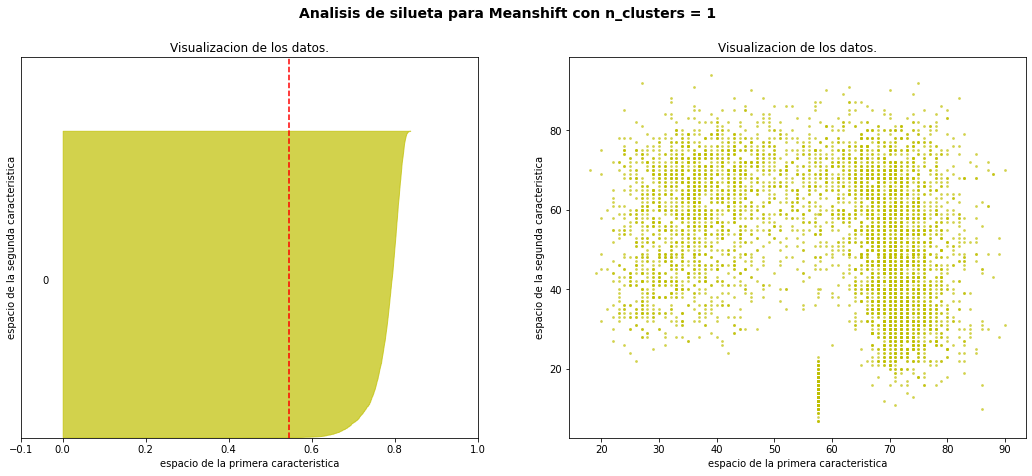

In [197]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

XX = RobustScaler().fit_transform(X)

print(__doc__)
range_n_clusters = [1]
sse ={}
for n_clusters in range_n_clusters: 
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(df_skills) + (n_clusters + 1) * 10])
    clusterer = MeanShift(bandwidth=bandwidth, bin_seeding=True)
    cluster_labels = clusterer.fit_predict(XX)
  
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("Para n_clusters =", n_clusters,
          "El silhouette_score promedio es :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(XX, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor='y', edgecolor='y', alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("Visualizacion de los datos.")
    ax1.set_xlabel("espacio de la primera caracteristica")
    ax1.set_ylabel("espacio de la segunda caracteristica")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    ax2.scatter(df_skills[skill_1], df_skills[skill_2], marker='.', s=30, lw=0, alpha=0.7,
                c='y', edgecolor='k')

    ax2.set_title("Visualizacion de los datos.")
    ax2.set_xlabel("espacio de la primera caracteristica")
    ax2.set_ylabel("espacio de la segunda caracteristica")

    plt.suptitle(("Analisis de silueta para Meanshift "
                  "con n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
plt.show()
clusterer = MeanShift(bandwidth=bandwidth, bin_seeding=True)
cluster_labels = clusterer.fit_predict(XX)

#colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clust)
ax2.scatter(df_skills[skill_1], df_skills[skill_2], marker='.', s=30, lw=0, alpha=0.7,c='y', edgecolor='k')

ax2.set_title("Visualizacion de los datos.")
ax2.set_xlabel("espacio de la primera caracteristica")
ax2.set_ylabel("espacio de la segunda caracteristica")
plt.show()

**Análisis exploratorio de las clases**

In [198]:
from IPython.display import display, HTML
print("\033[1m-MEANSHIFT sin arqueros\033[0m")
for cluster in range(0,len(df_clusters['MeanShift'].unique())):
    km_cluster_ = df_clusters[df_clusters['MeanShift'] == cluster]
    print("\n\033[1m-Análisis descriptivo de Cluster nro: ( " , cluster , " )\n\033[0m")
    display(HTML(km_cluster_[skills_ratings].describe().to_html()))


-MEANSHIFT sin arqueros

-Análisis descriptivo de Cluster nro: (  0  )



,skill_moves,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
count,5337.000000,5337.000000,5337.000000,5337.000000,5337.000000,5337.000000,5337.000000,5337.000000,5337.000000,5337.000000,5337.000000,5337.00000,5337.000000,5337.000000,5337.000000,5337.000000,5337.000000,5337.000000,5337.000000,5337.000000,5337.000000,5337.000000,5337.000000,5337.000000,5337.000000,5337.000000,5337.000000,5337.000000,5337.000000,5337.000000,5337.000000,5337.000000,5337.000000,5337.000000,5337.000000,5337.000000,5337.000000,5337.000000,5337.000000,5337.000000,5337.000000
mean,2.843358,69.666342,60.459217,65.313996,69.592564,57.571540,69.998053,60.195616,55.704516,61.571107,69.144276,53.25089,66.472550,58.749297,52.728499,63.151209,69.578227,68.515458,68.718756,68.700019,70.941353,66.623759,67.993817,68.622822,70.906689,69.939854,58.801761,65.520330,55.638936,60.832490,62.970957,56.757916,69.246580,55.490912,55.814315,52.881581,13.005246,12.942290,12.897133,12.971894,13.026794
std,0.761352,12.108441,13.167114,8.600305,8.891064,17.203038,8.092859,16.221525,18.223752,14.832872,10.411933,17.27283,14.939171,17.115034,17.365922,12.154452,12.056834,13.833673,13.446064,13.387999,5.700921,13.832017,11.285421,12.032469,12.521657,11.529797,17.104320,15.003598,20.726603,17.452453,12.817866,14.575073,8.108354,19.954821,21.699516,22.054957,12.503701,11.921974,11.583496,12.208074,12.740484
min,1.000000,29.000000,15.000000,34.000000,34.000000,18.000000,35.000000,6.000000,5.000000,7.000000,11.000000,5.00000,7.000000,6.000000,7.000000,9.000000,8.000000,15.000000,15.000000,18.000000,50.000000,20.000000,15.000000,29.000000,13.000000,27.000000,4.000000,12.000000,7.000000,3.000000,13.000000,10.000000,21.000000,6.000000,7.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,64.000000,53.000000,61.000000,66.000000,41.000000,66.000000,52.000000,43.000000,54.000000,66.000000,41.00000,63.000000,49.000000,40.000000,58.000000,67.000000,61.000000,62.000000,62.000000,67.000000,59.000000,62.000000,62.000000,66.000000,63.000000,51.000000,58.000000,36.000000,54.000000,56.000000,47.000000,65.000000,38.000000,35.000000,31.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,3.000000,70.000000,64.000000,66.000000,71.000000,65.000000,71.000000,65.000000,60.000000,64.000000,71.000000,57.00000,71.000000,63.000000,55.000000,66.000000,72.000000,70.000000,71.000000,71.000000,71.000000,69.000000,70.000000,70.000000,72.000000,71.000000,64.000000,69.000000,65.000000,66.000000,66.000000,59.000000,70.000000,64.000000,67.000000,63.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,3.000000,78.000000,70.000000,71.000000,75.000000,71.000000,76.000000,72.000000,70.000000,72.000000,75.000000,67.00000,75.000000,71.000000,67.000000,71.000000,76.000000,78.000000,78.000000,78.000000,74.000000,76.000000,76.000000,77.000000,78.000000,78.000000,71.000000,76.000000,72.000000,73.000000,72.000000,68.000000,74.000000,71.000000,73.000000,71.000000,14.000000,14.000000,14.000000,14.000000,13.000000
max,5.000000,96.000000,93.000000,92.000000,96.000000,90.000000,90.000000,93.000000,95.000000,93.000000,92.000000,90.00000,97.000000,94.000000,94.000000,92.000000,96.000000,97.000000,96.000000,96.000000,96.000000,96.000000,95.000000,95.000000,97.000000,95.000000,94.000000,95.000000,92.000000,95.000000,94.000000,92.000000,96.000000,94